In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [2]:
CustomerBehaviorData=pd.read_excel('CustomerBehaviorData.xlsx')

In [3]:
CustomerDemographics =pd.read_excel('CustomerDemographics.xlsx')

In [4]:
CreditConsumptionData =pd.read_excel('CreditConsumptionData.xlsx')

In [5]:
CustomerBehaviorData.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,...,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,...,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,...,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,...,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,...,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89


In [6]:
CustomerDemographics

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0
...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0


In [7]:
CreditConsumptionData

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0
...,...,...
19995,12512,NaN
19996,14224,NaN
19997,18740,NaN
19998,18134,NaN


In [8]:
CustomerBehaviorData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     20000 non-null  int64  
 1   cc_cons_apr            20000 non-null  float64
 2   dc_cons_apr            20000 non-null  float64
 3   cc_cons_may            19999 non-null  float64
 4   dc_cons_may            20000 non-null  float64
 5   cc_cons_jun            20000 non-null  float64
 6   dc_cons_jun            19999 non-null  float64
 7   cc_count_apr           19999 non-null  float64
 8   cc_count_may           20000 non-null  int64  
 9   cc_count_jun           20000 non-null  int64  
 10  dc_count_apr           20000 non-null  int64  
 11  dc_count_may           20000 non-null  int64  
 12  dc_count_jun           20000 non-null  int64  
 13  card_lim               20000 non-null  int64  
 14  personal_loan_active   20000 non-null  int64  
 15  ve

In [9]:
CustomerDemographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   account_type                  19999 non-null  object 
 2   gender                        19999 non-null  object 
 3   age                           20000 non-null  int64  
 4   Income                        19999 non-null  object 
 5   Emp_Tenure_Years              20000 non-null  float64
 6   Tenure_with_Bank              20000 non-null  int64  
 7   region_code                   19999 non-null  float64
 8   NetBanking_Flag               20000 non-null  int64  
 9   Avg_days_between_transaction  19997 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 1.5+ MB


In [10]:
CreditConsumptionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       20000 non-null  int64  
 1   cc_cons  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 312.6 KB


In [11]:
CustomerBehaviorData.columns

Index(['ID', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'loan_enq', 'emi_active'],
      dtype='object')

In [12]:
CustomerDemographics.columns

Index(['ID', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction'],
      dtype='object')

In [13]:
CreditConsumptionData.columns

Index(['ID', 'cc_cons'], dtype='object')

In [14]:
r1=pd.merge(left=CustomerBehaviorData,right=CustomerDemographics,left_on="ID",right_on="ID")

In [15]:
r1

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,17051,3412.600,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,...,3448.84,current,M,30,MEDIUM,7.0,5,956.0,1,20.0
1,11491,18133.760,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,...,3812.69,current,M,37,LOW,10.2,8,966.0,1,5.0
2,7433,6363.650,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,...,9432.90,current,M,33,MEDIUM,3.9,3,505.0,1,15.0
3,14606,12765.660,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,...,144.61,current,M,63,LOW,25.8,6,631.0,0,15.0
4,8381,27819.700,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,...,1887.89,saving,M,33,MEDIUM,6.5,7,698.0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,...,7870.88,current,M,35,MEDIUM,13.5,1,523.0,0,7.0
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,...,3668.30,current,M,53,MEDIUM,9.9,7,723.0,1,2.0
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,...,5450.34,current,M,62,HIGH,37.8,8,863.0,1,16.0
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,...,59.29,current,M,34,MEDIUM,12.6,4,882.0,0,13.0


In [16]:
merged_df=pd.merge(left=CreditConsumptionData,right=r1,left_on="ID",right_on="ID")

In [17]:
merged_df

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,12554,20014.0,24893.000,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,...,1674.09,current,M,35,MEDIUM,15.0,1,708.0,0,17.0
1,17645,10173.0,18941.620,966.00,20672.00,287.00,4217.00,885.00,1.0,7,...,13043.34,current,M,35,HIGH,15.0,6,123.0,0,14.0
2,7604,16095.0,5678.870,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,...,25375.27,current,M,55,MEDIUM,24.5,1,802.0,1,3.0
3,1590,7707.0,30489.500,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,...,3544.33,current,F,29,MEDIUM,4.5,6,867.0,1,4.0
4,16556,96408.0,7441.400,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,...,12780.44,current,M,34,MEDIUM,12.6,4,802.0,1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,NaN,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,...,7870.88,current,M,35,MEDIUM,13.5,1,523.0,0,7.0
19996,14224,NaN,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,...,3668.30,current,M,53,MEDIUM,9.9,7,723.0,1,2.0
19997,18740,NaN,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,...,5450.34,current,M,62,HIGH,37.8,8,863.0,1,16.0
19998,18134,NaN,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,...,59.29,current,M,34,MEDIUM,12.6,4,882.0,0,13.0


In [18]:
merged_df.shape

(20000, 49)

In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   cc_cons                       15000 non-null  float64
 2   cc_cons_apr                   20000 non-null  float64
 3   dc_cons_apr                   20000 non-null  float64
 4   cc_cons_may                   19999 non-null  float64
 5   dc_cons_may                   20000 non-null  float64
 6   cc_cons_jun                   20000 non-null  float64
 7   dc_cons_jun                   19999 non-null  float64
 8   cc_count_apr                  19999 non-null  float64
 9   cc_count_may                  20000 non-null  int64  
 10  cc_count_jun                  20000 non-null  int64  
 11  dc_count_apr                  20000 non-null  int64  
 12  dc_count_may                  20000 non-null  int64  
 13  d

In [20]:
merged_df

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,12554,20014.0,24893.000,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,...,1674.09,current,M,35,MEDIUM,15.0,1,708.0,0,17.0
1,17645,10173.0,18941.620,966.00,20672.00,287.00,4217.00,885.00,1.0,7,...,13043.34,current,M,35,HIGH,15.0,6,123.0,0,14.0
2,7604,16095.0,5678.870,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,...,25375.27,current,M,55,MEDIUM,24.5,1,802.0,1,3.0
3,1590,7707.0,30489.500,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,...,3544.33,current,F,29,MEDIUM,4.5,6,867.0,1,4.0
4,16556,96408.0,7441.400,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,...,12780.44,current,M,34,MEDIUM,12.6,4,802.0,1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,NaN,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,...,7870.88,current,M,35,MEDIUM,13.5,1,523.0,0,7.0
19996,14224,NaN,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,...,3668.30,current,M,53,MEDIUM,9.9,7,723.0,1,2.0
19997,18740,NaN,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,...,5450.34,current,M,62,HIGH,37.8,8,863.0,1,16.0
19998,18134,NaN,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,...,59.29,current,M,34,MEDIUM,12.6,4,882.0,0,13.0


In [21]:
merged_df.duplicated().sum()

0

In [22]:
merged_df=merged_df.dropna(subset=['cc_cons_may','dc_cons_jun','cc_count_apr','personal_loan_closed','investment_3','debit_count_apr','loan_enq','emi_active','account_type','gender','Income','region_code', 'Avg_days_between_transaction'])

In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19988 entries, 0 to 19998
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            19988 non-null  int64  
 1   cc_cons                       14995 non-null  float64
 2   cc_cons_apr                   19988 non-null  float64
 3   dc_cons_apr                   19988 non-null  float64
 4   cc_cons_may                   19988 non-null  float64
 5   dc_cons_may                   19988 non-null  float64
 6   cc_cons_jun                   19988 non-null  float64
 7   dc_cons_jun                   19988 non-null  float64
 8   cc_count_apr                  19988 non-null  float64
 9   cc_count_may                  19988 non-null  int64  
 10  cc_count_jun                  19988 non-null  int64  
 11  dc_count_apr                  19988 non-null  int64  
 12  dc_count_may                  19988 non-null  int64  
 13  dc_cou

In [24]:
object_columns = merged_df.select_dtypes(include=['object'])

# Iterate over object columns and find value counts
for column in object_columns.columns:
    print("Column:", column)
    print(merged_df[column].value_counts())
    print()

Column: loan_enq
loan_enq
Y    19988
Name: count, dtype: int64

Column: account_type
account_type
current    16914
saving      3074
Name: count, dtype: int64

Column: gender
gender
M    17277
F     2711
Name: count, dtype: int64

Column: Income
Income
MEDIUM    12769
LOW        5608
HIGH       1611
Name: count, dtype: int64



In [25]:
from sklearn.preprocessing import OrdinalEncoder

# Create an OrdinalEncoder instance
encoder = OrdinalEncoder()

# Fit and transform the selected columns
merged_df[['gender']] = encoder.fit_transform(merged_df[['gender']]).astype(int)


In [26]:
merged_df[['gender']]

,gender
0,1
1,1
2,1
3,0
5,1
...,...
19994,1
19995,1
19996,1
19997,1


In [27]:
income_mapping = {'LOW': 0, 'MEDIUM': 1, 'HIGH': 2}

# Apply mapping to the "Income" column
merged_df['Income'] = merged_df['Income'].map(income_mapping)


In [28]:
merged_df.shape

(19988, 49)

In [29]:
merged_df.drop(['loan_enq', 'ID'], axis=1, inplace=True)

In [30]:
merged_df

,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,20014.0,24893.000,378.00,10288.00,29664.00,16291.400,11432.00,2.0,26,10,...,1674.09,current,1,35,1,15.0,1,708.0,0,17.0
1,10173.0,18941.620,966.00,20672.00,287.00,4217.000,885.00,1.0,7,13,...,13043.34,current,1,35,2,15.0,6,123.0,0,14.0
2,16095.0,5678.870,2724.00,1964.50,3933.11,23956.250,5168.00,43.0,32,102,...,25375.27,current,1,55,1,24.5,1,802.0,1,3.0
3,7707.0,30489.500,1236.00,12609.88,9138.14,17521.000,13650.30,53.0,1,50,...,3544.33,current,0,29,1,4.5,6,867.0,1,4.0
5,130263.0,2328.220,1597.54,19979.75,1045.85,11686.255,628.00,6.0,7,59,...,5026.50,current,1,27,1,4.9,3,958.0,1,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,NaN,3043.000,742.20,3418.00,2181.94,12032.600,788.00,1.0,5,6,...,421.64,current,1,60,1,24.0,5,968.0,0,9.0
19995,NaN,4641.500,5979.58,6008.61,4410.00,41743.000,1884.00,26.0,1,4,...,7870.88,current,1,35,1,13.5,1,523.0,0,7.0
19996,NaN,4994.450,2805.37,23214.00,5870.00,1041.000,1008.73,37.0,56,50,...,3668.30,current,1,53,1,9.9,7,723.0,1,2.0
19997,NaN,3262.145,2871.00,7335.25,11774.04,4130.000,1413.00,12.0,77,1,...,5450.34,current,1,62,2,37.8,8,863.0,1,16.0


In [31]:
# Perform one-hot encoding on 'Account_type' column
one_hot_encoded = pd.get_dummies(merged_df['account_type'], prefix='account_type')

# Concatenate the one-hot encoded columns with the original DataFrame
merged_df = pd.concat([merged_df, one_hot_encoded], axis=1)

# Drop the original 'Account_type' column
merged_df.drop('account_type', axis=1, inplace=True)

# View the modified DataFrame
print(merged_df.head())


    cc_cons  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  \
0   20014.0     24893.00       378.00     10288.00     29664.00    16291.400   
1   10173.0     18941.62       966.00     20672.00       287.00     4217.000   
2   16095.0      5678.87      2724.00      1964.50      3933.11    23956.250   
3    7707.0     30489.50      1236.00     12609.88      9138.14    17521.000   
5  130263.0      2328.22      1597.54     19979.75      1045.85    11686.255   

   dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  ...  gender  age  \
0      11432.0           2.0            26            10  ...       1   35   
1        885.0           1.0             7            13  ...       1   35   
2       5168.0          43.0            32           102  ...       1   55   
3      13650.3          53.0             1            50  ...       0   29   
5        628.0           6.0             7            59  ...       1   27   

   Income  Emp_Tenure_Years  Tenure_with_Bank  reg

In [32]:
merged_df

,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_current,account_type_saving
0,20014.0,24893.000,378.00,10288.00,29664.00,16291.400,11432.00,2.0,26,10,...,1,35,1,15.0,1,708.0,0,17.0,True,False
1,10173.0,18941.620,966.00,20672.00,287.00,4217.000,885.00,1.0,7,13,...,1,35,2,15.0,6,123.0,0,14.0,True,False
2,16095.0,5678.870,2724.00,1964.50,3933.11,23956.250,5168.00,43.0,32,102,...,1,55,1,24.5,1,802.0,1,3.0,True,False
3,7707.0,30489.500,1236.00,12609.88,9138.14,17521.000,13650.30,53.0,1,50,...,0,29,1,4.5,6,867.0,1,4.0,True,False
5,130263.0,2328.220,1597.54,19979.75,1045.85,11686.255,628.00,6.0,7,59,...,1,27,1,4.9,3,958.0,1,11.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,NaN,3043.000,742.20,3418.00,2181.94,12032.600,788.00,1.0,5,6,...,1,60,1,24.0,5,968.0,0,9.0,True,False
19995,NaN,4641.500,5979.58,6008.61,4410.00,41743.000,1884.00,26.0,1,4,...,1,35,1,13.5,1,523.0,0,7.0,True,False
19996,NaN,4994.450,2805.37,23214.00,5870.00,1041.000,1008.73,37.0,56,50,...,1,53,1,9.9,7,723.0,1,2.0,True,False
19997,NaN,3262.145,2871.00,7335.25,11774.04,4130.000,1413.00,12.0,77,1,...,1,62,2,37.8,8,863.0,1,16.0,True,False


In [33]:
merged_df.corr()

,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,account_type_current,account_type_saving
cc_cons,1.000000,0.006155,-0.000144,0.021807,-0.000572,-0.000838,0.002875,-0.009759,0.016342,-0.002012,...,0.002196,-0.007035,0.006373,-0.008469,0.011467,-0.018968,0.001558,-0.005484,-0.002933,0.002933
cc_cons_apr,0.006155,1.000000,-0.004623,0.010897,0.001443,0.006997,-0.003110,-0.000496,0.008905,0.008556,...,0.006376,0.007831,-0.001291,0.007416,-0.003268,0.002333,0.007387,0.002875,-0.006513,0.006513
dc_cons_apr,-0.000144,-0.004623,1.000000,0.004074,-0.003346,0.003671,0.000660,0.005230,-0.002800,0.010448,...,-0.005737,0.009949,-0.009794,0.009864,-0.010803,-0.005750,0.000840,0.007442,-0.009094,0.009094
cc_cons_may,0.021807,0.010897,0.004074,1.000000,-0.010686,-0.001243,-0.002757,-0.007265,-0.007017,-0.006740,...,0.004345,0.002553,0.013724,-0.001917,0.008926,-0.004026,0.006015,0.006196,-0.007331,0.007331
dc_cons_may,-0.000572,0.001443,-0.003346,-0.010686,1.000000,-0.007827,0.001760,0.001415,0.001836,-0.005809,...,0.001687,-0.001425,-0.012507,0.002702,0.000716,0.007668,0.008803,-0.001227,-0.002244,0.002244
cc_cons_jun,-0.000838,0.006997,0.003671,-0.001243,-0.007827,1.000000,0.002031,0.005907,0.008128,0.010542,...,0.003316,-0.012641,-0.008304,-0.014833,-0.012754,-0.003472,0.000064,0.003216,0.017494,-0.017494
dc_cons_jun,0.002875,-0.003110,0.000660,-0.002757,0.001760,0.002031,1.000000,-0.006678,0.007048,0.008275,...,0.000681,0.001434,-0.002325,0.008949,-0.001441,0.009445,-0.001197,-0.001893,-0.008791,0.008791
cc_count_apr,-0.009759,-0.000496,0.005230,-0.007265,0.001415,0.005907,-0.006678,1.000000,0.001830,0.010173,...,0.005879,0.004628,-0.001649,0.005483,0.015288,0.002103,0.015365,-0.009660,0.008341,-0.008341
cc_count_may,0.016342,0.008905,-0.002800,-0.007017,0.001836,0.008128,0.007048,0.001830,1.000000,0.000495,...,0.002636,0.002014,0.001576,-0.001022,-0.006975,0.004208,0.005009,0.009350,0.002437,-0.002437
cc_count_jun,-0.002012,0.008556,0.010448,-0.006740,-0.005809,0.010542,0.008275,0.010173,0.000495,1.000000,...,-0.000803,-0.000443,-0.009623,0.002978,-0.007302,-0.002528,-0.001017,0.003438,0.009175,-0.009175


In [34]:
# EDA

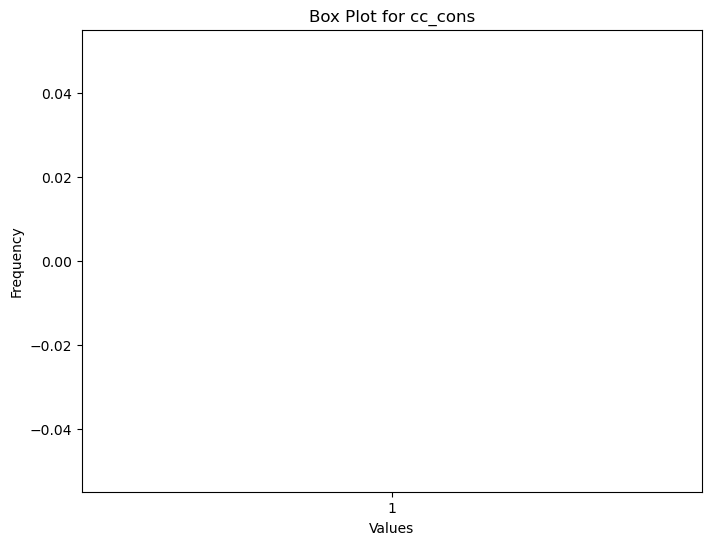

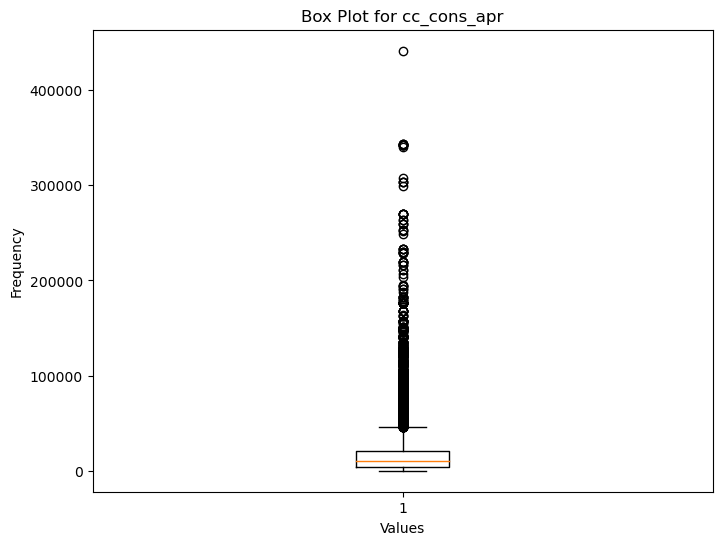

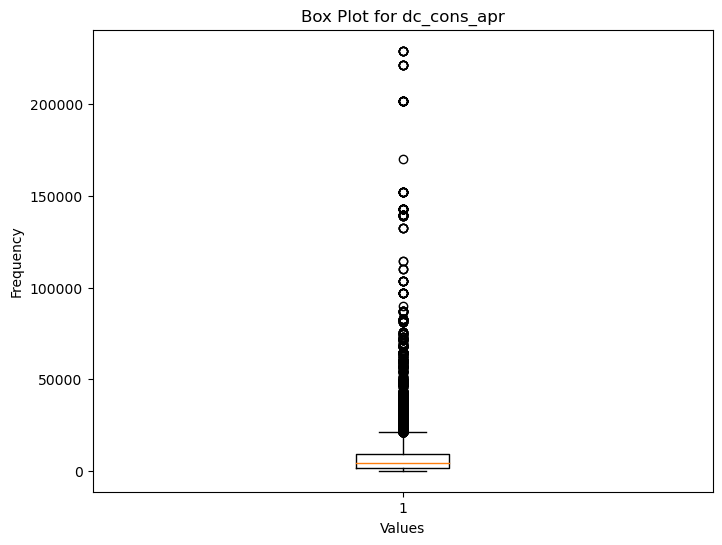

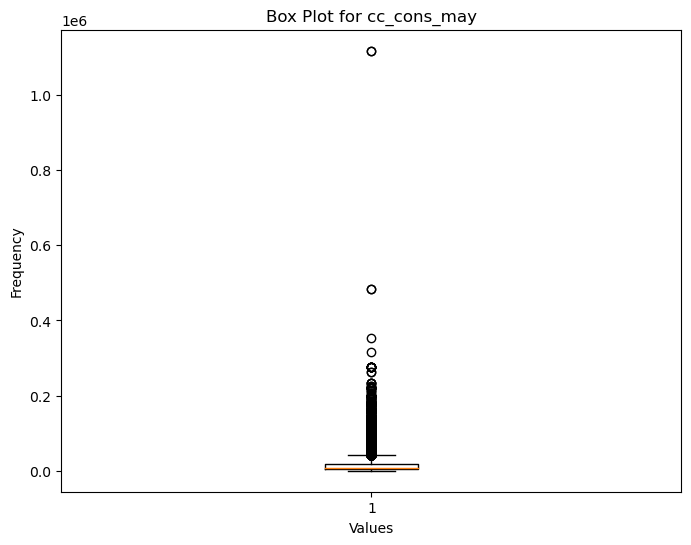

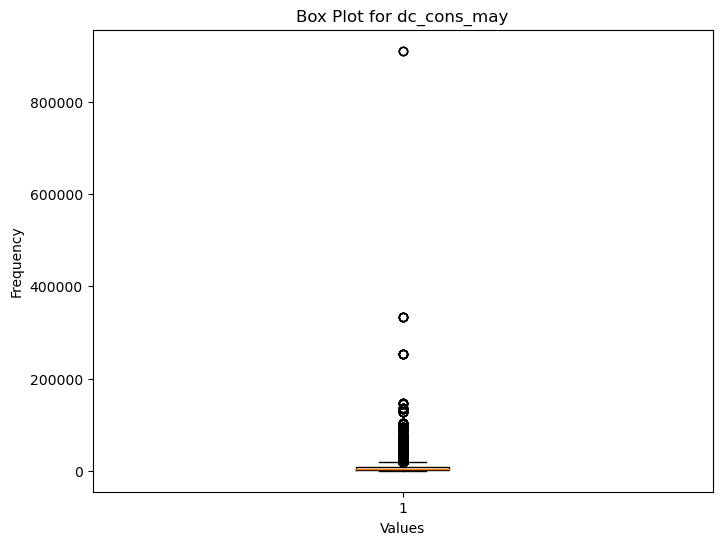

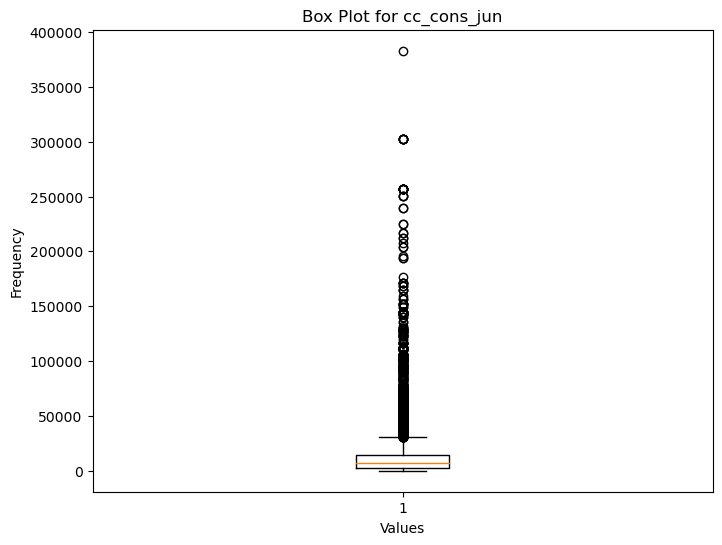

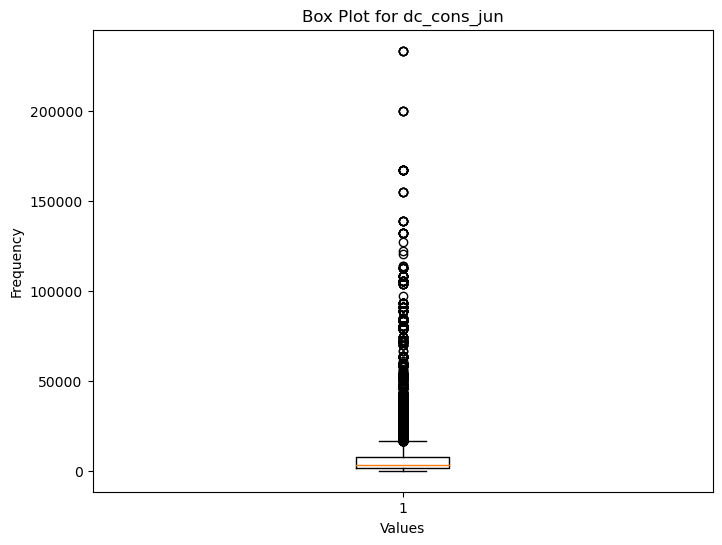

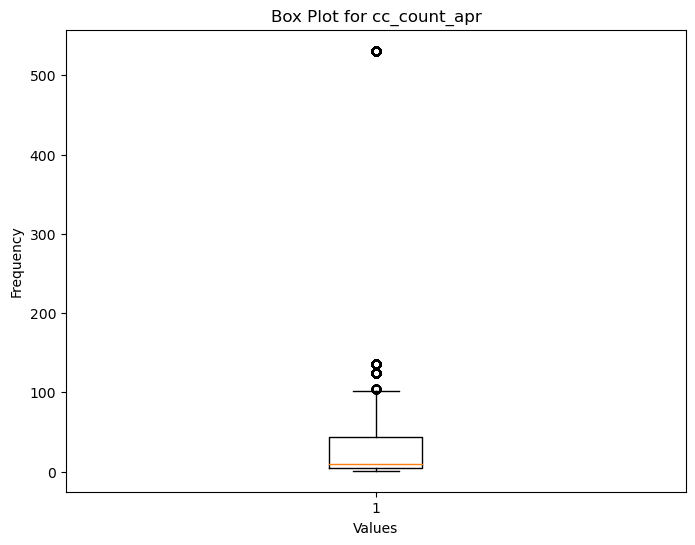

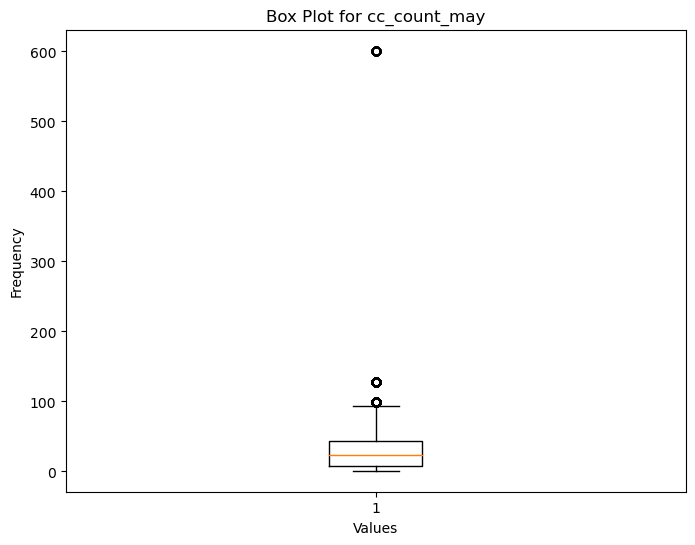

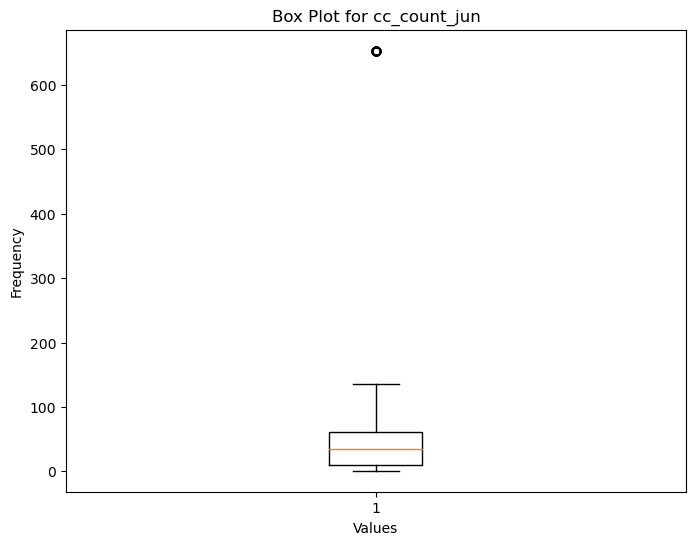

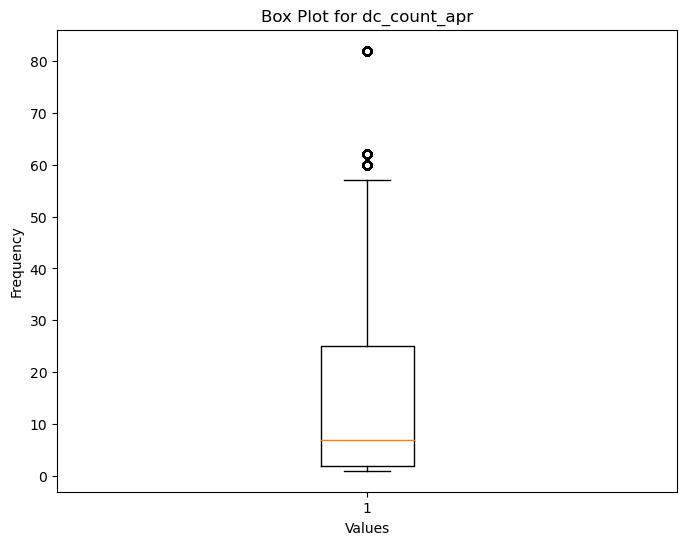

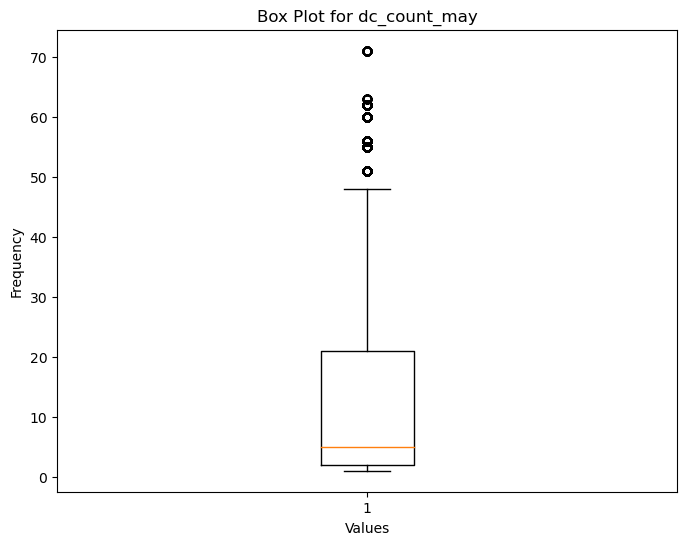

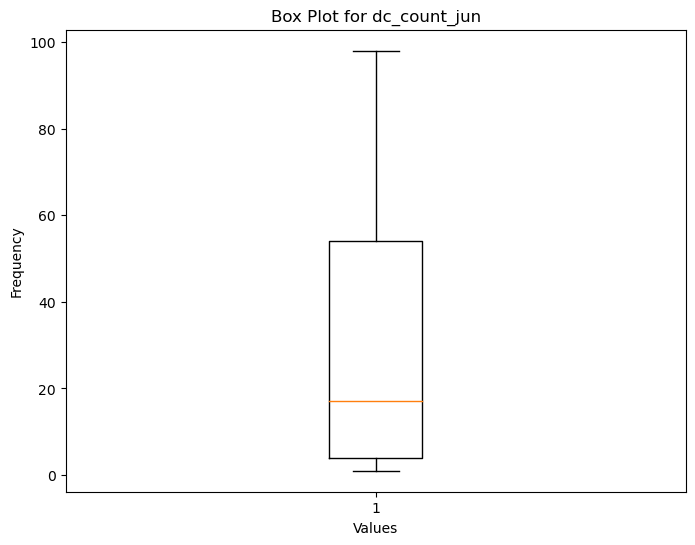

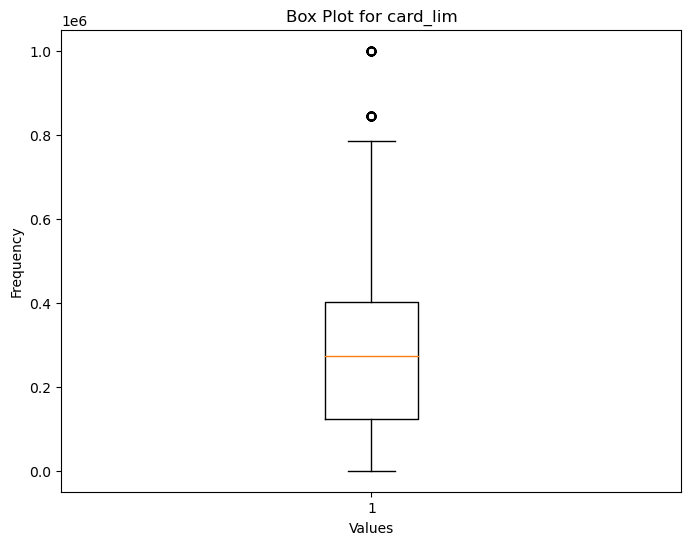

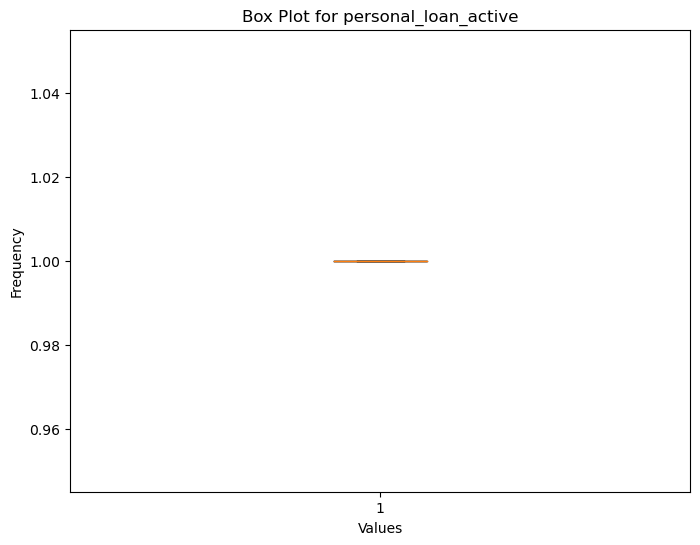

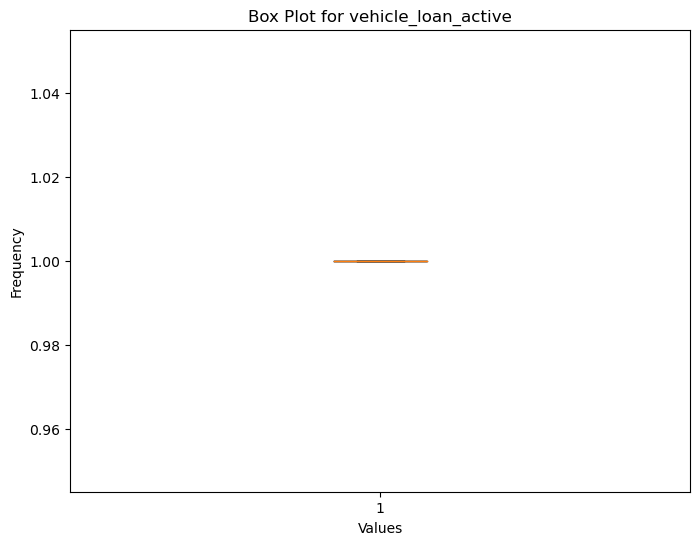

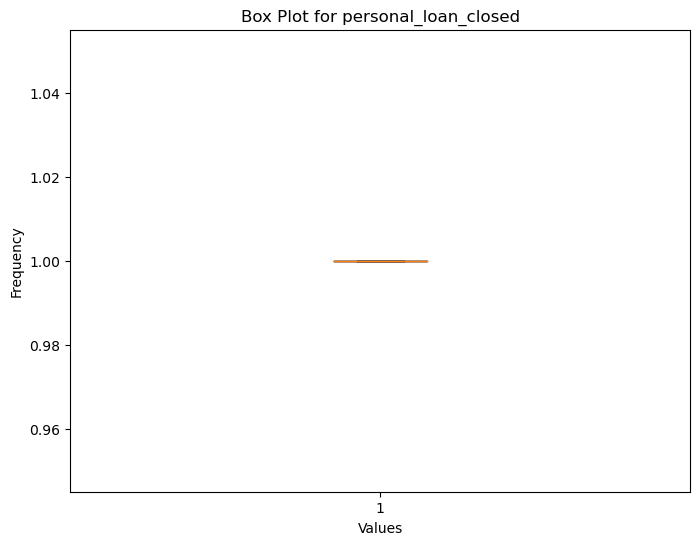

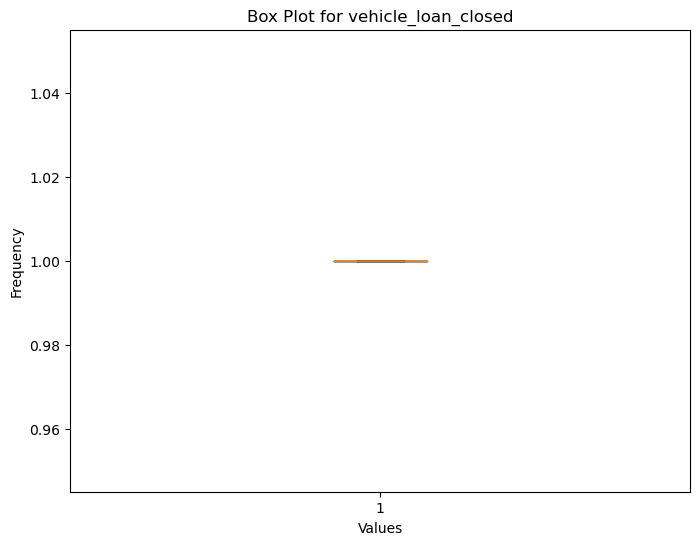

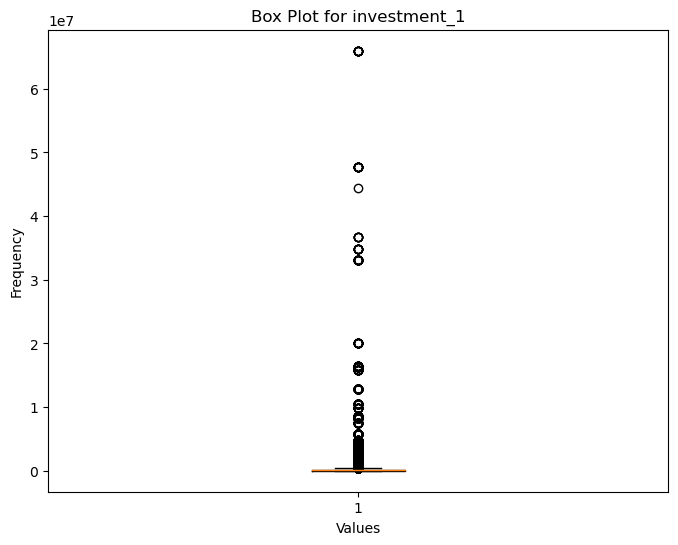

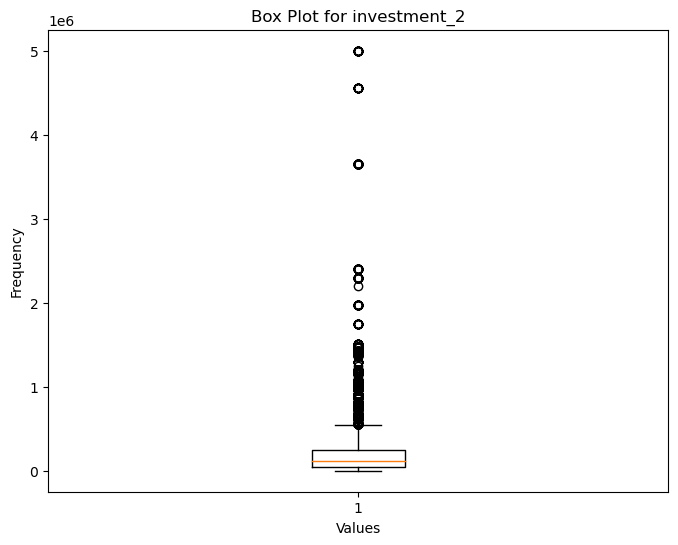

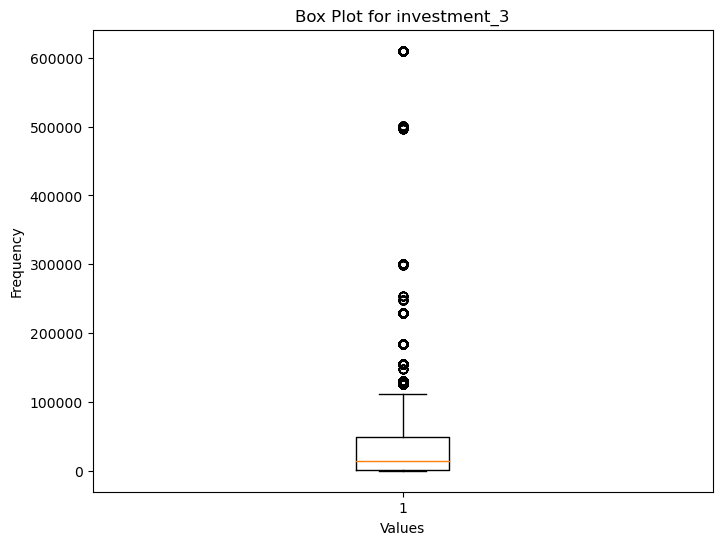

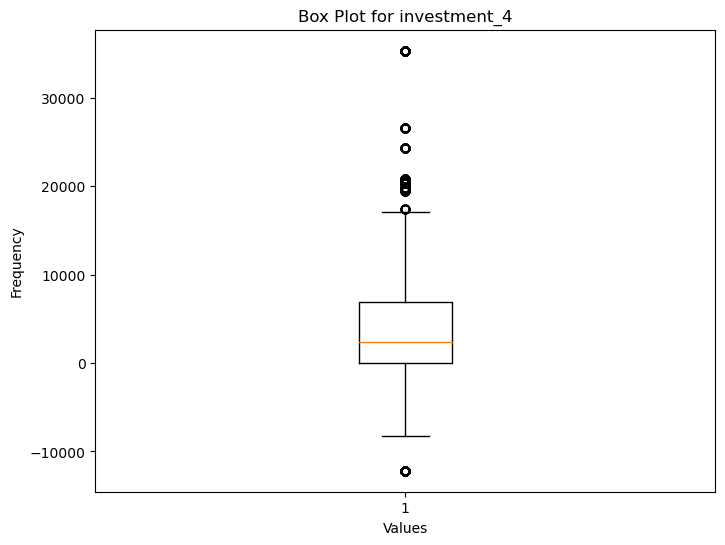

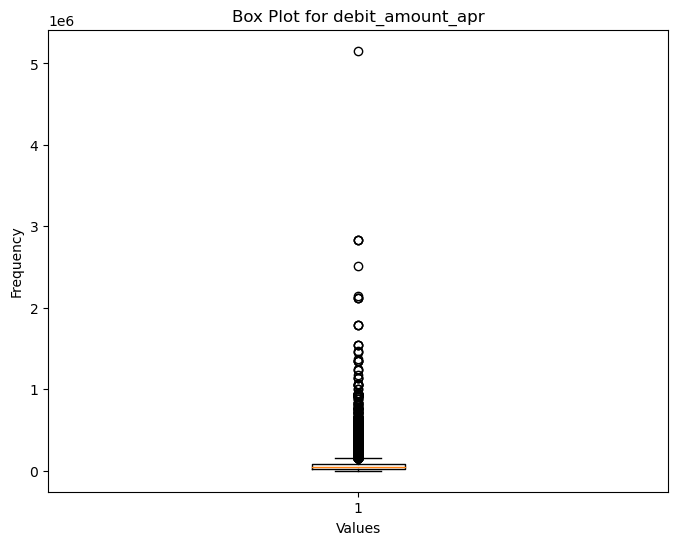

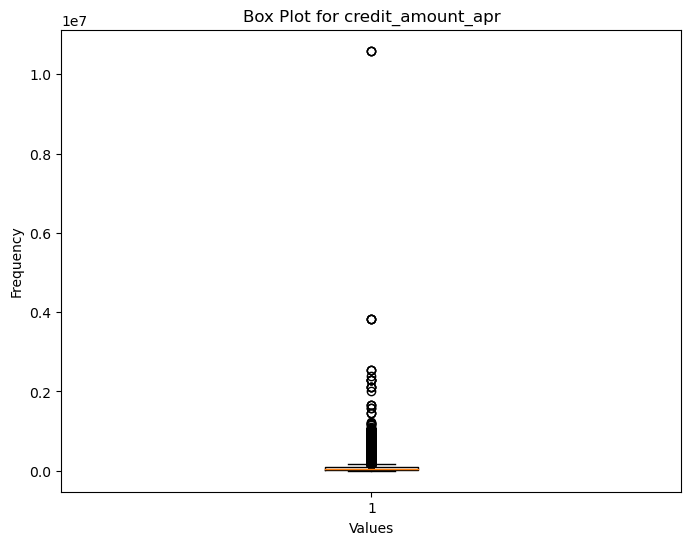

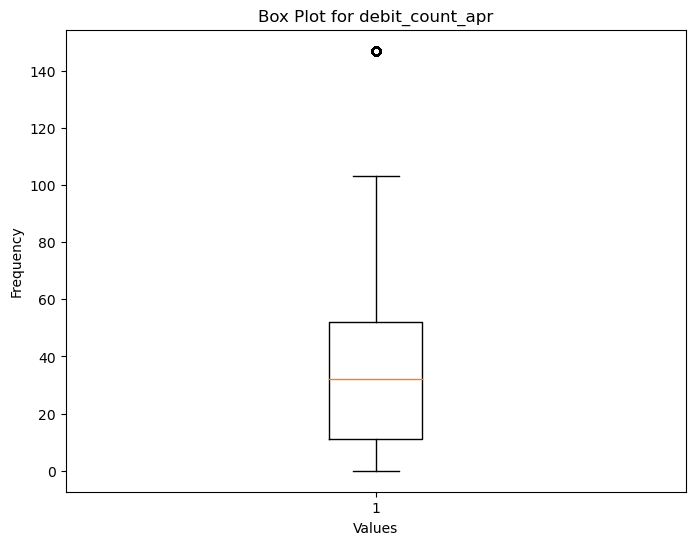

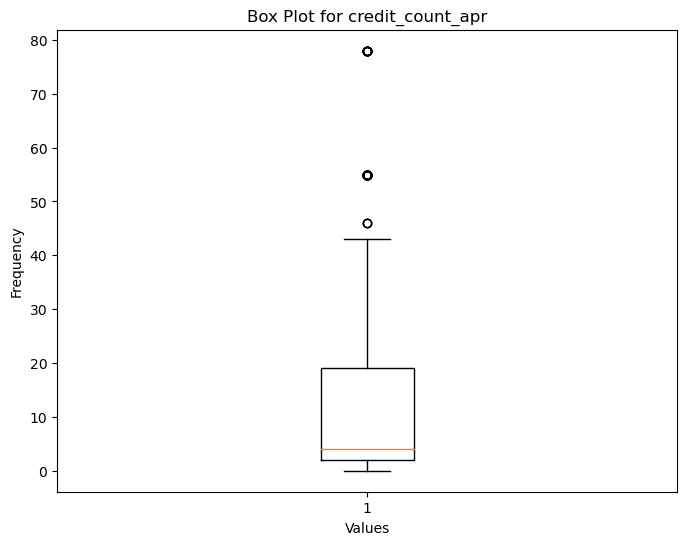

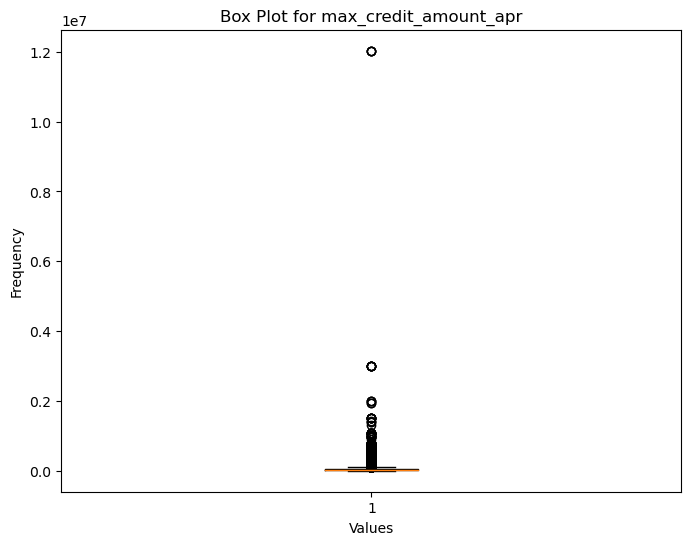

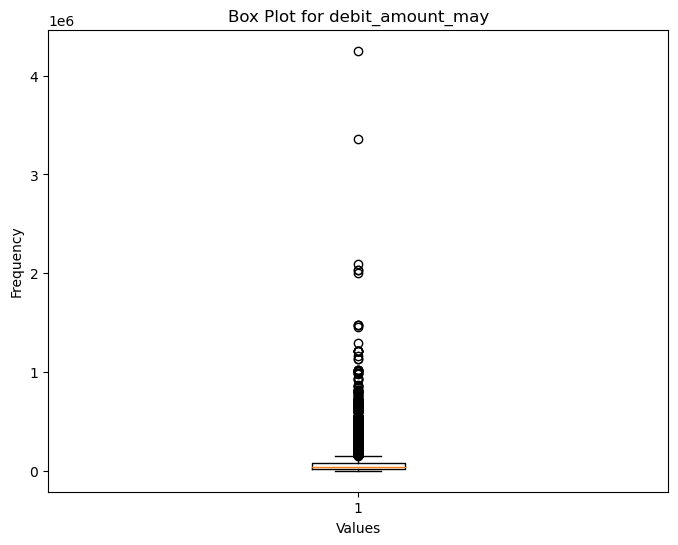

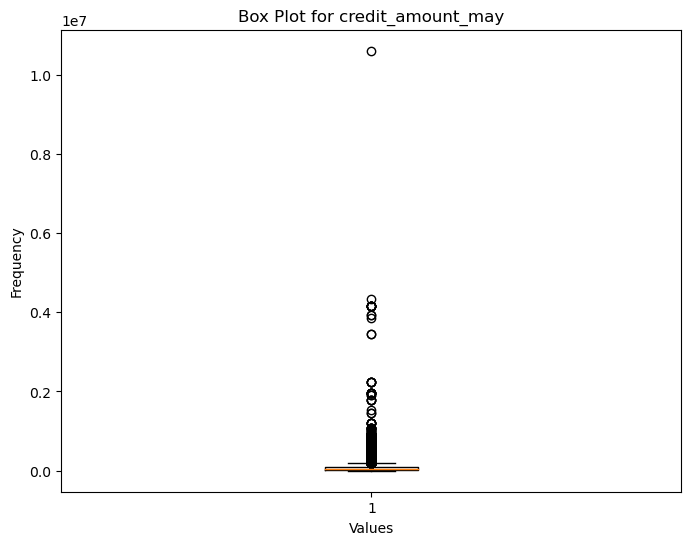

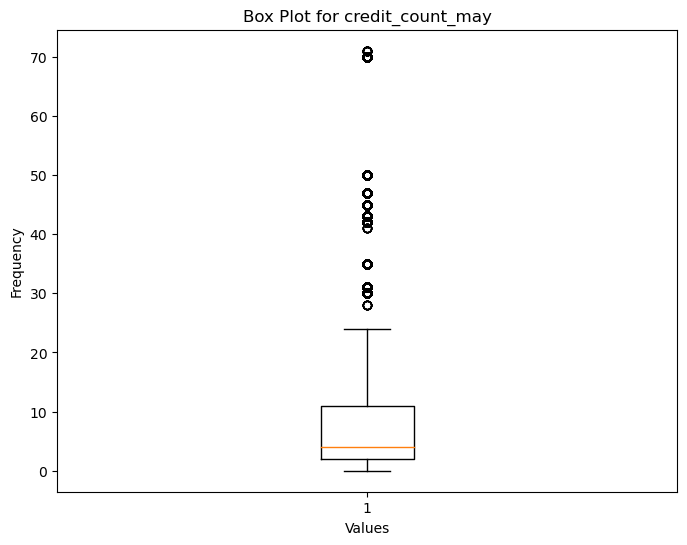

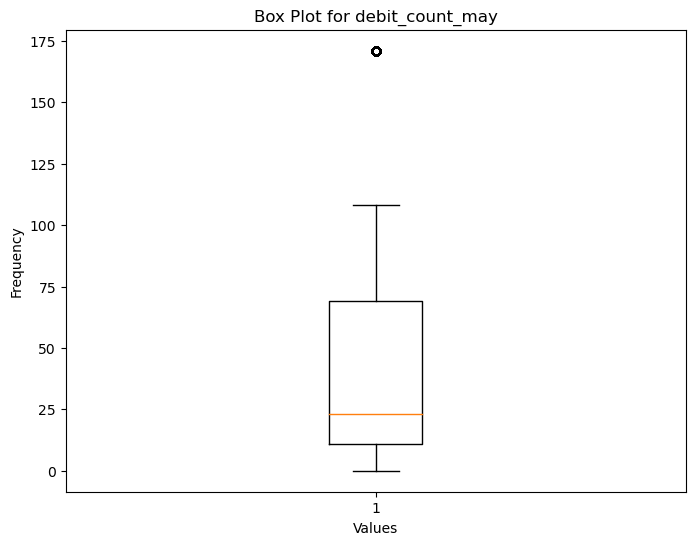

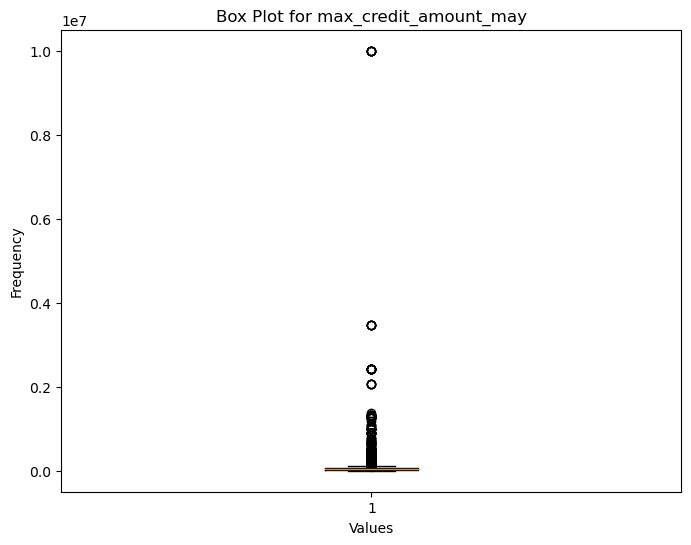

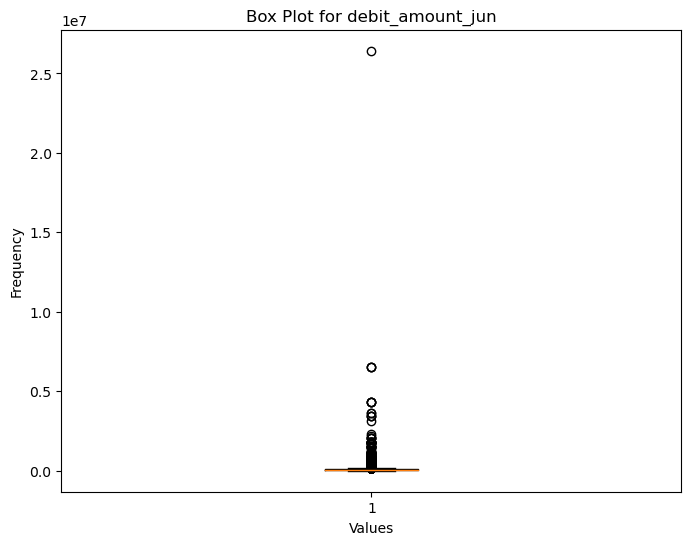

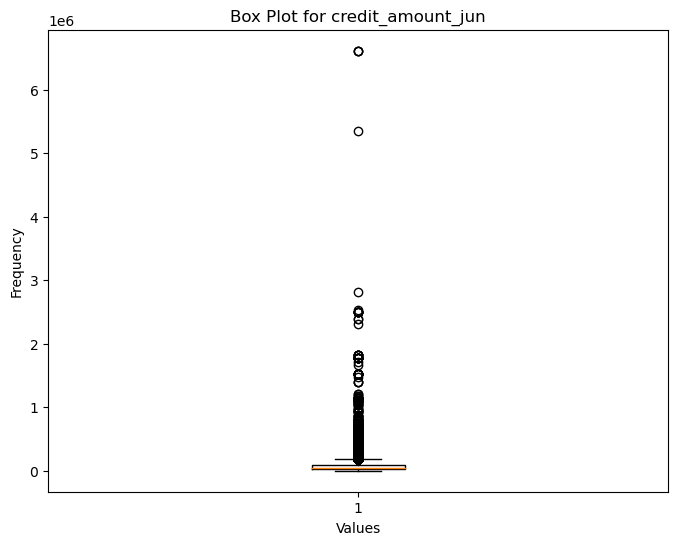

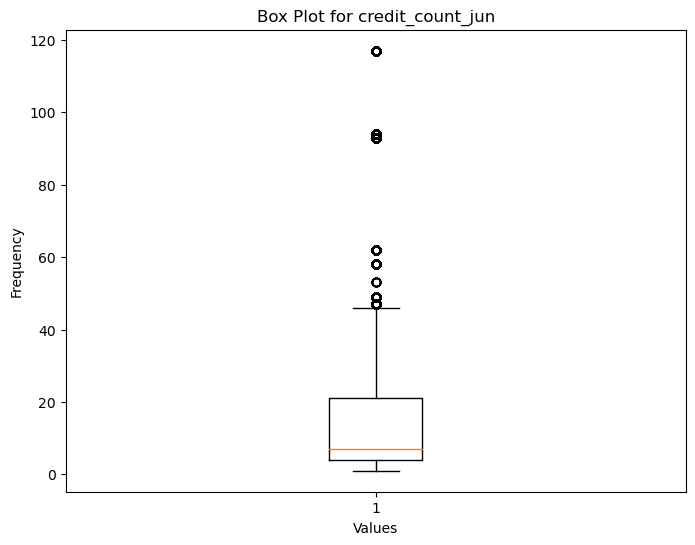

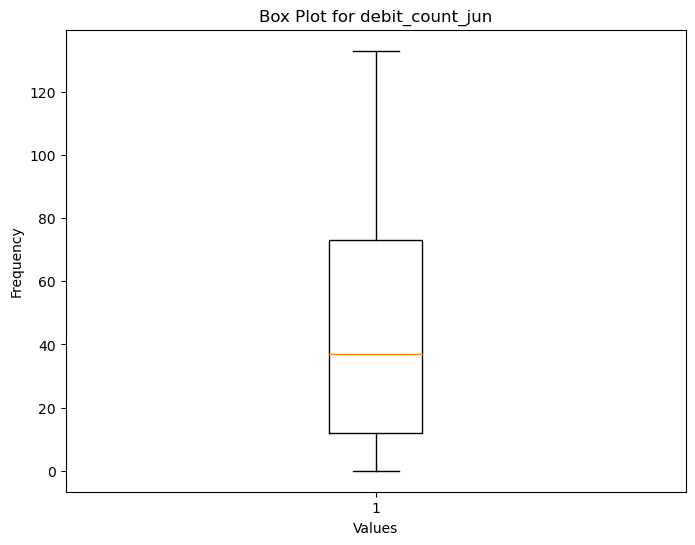

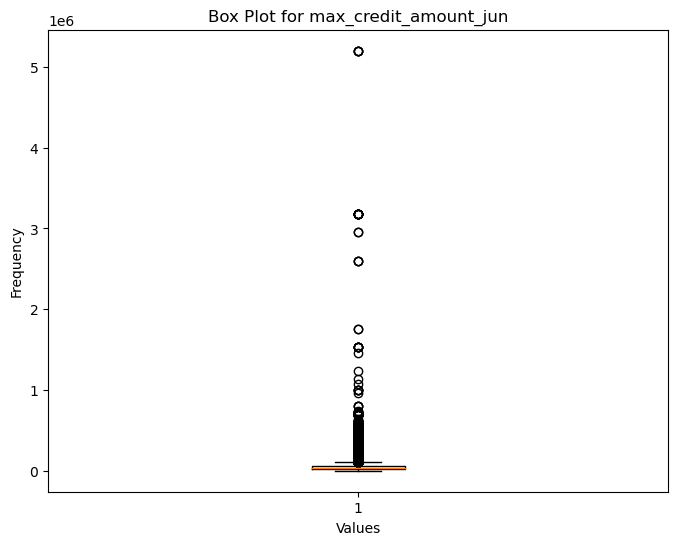

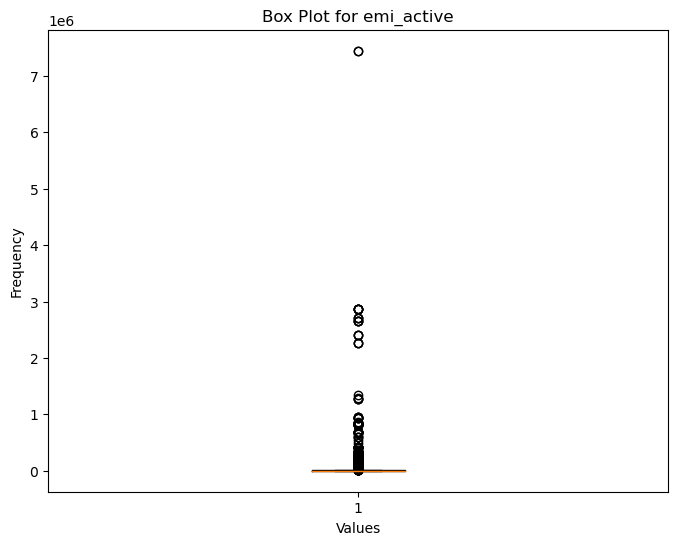

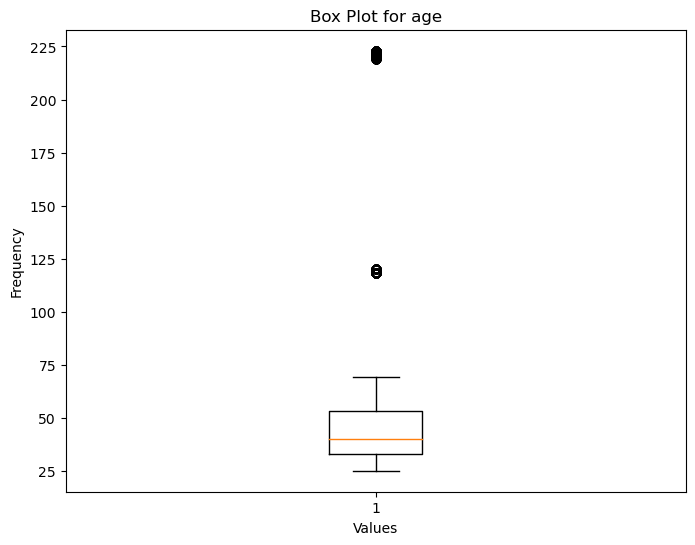

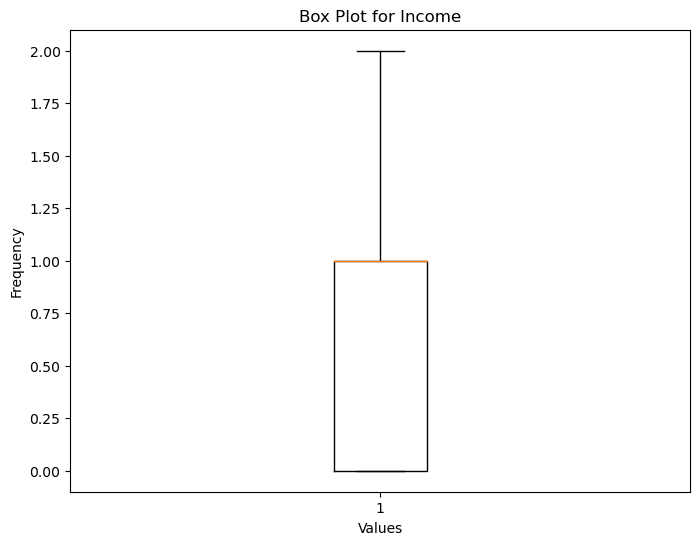

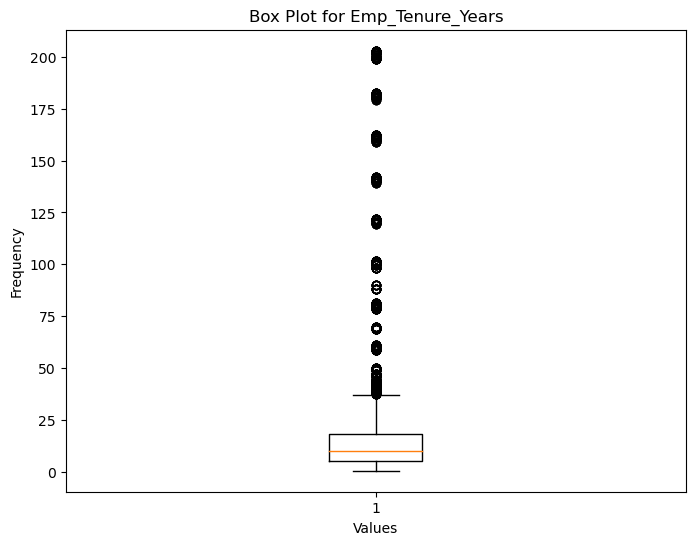

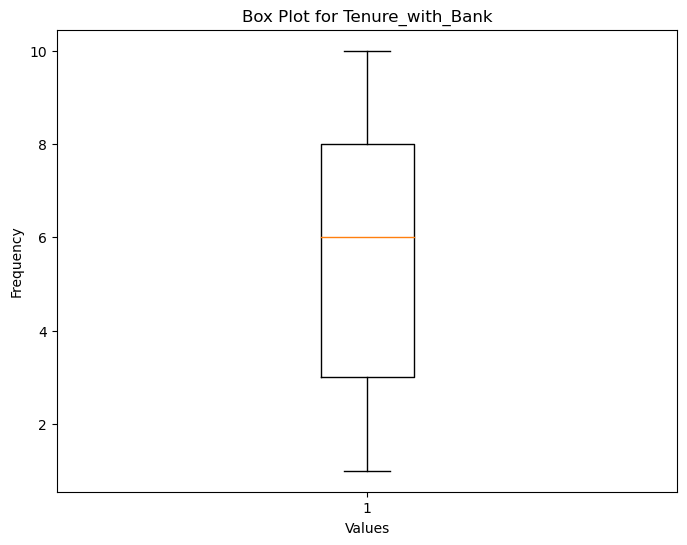

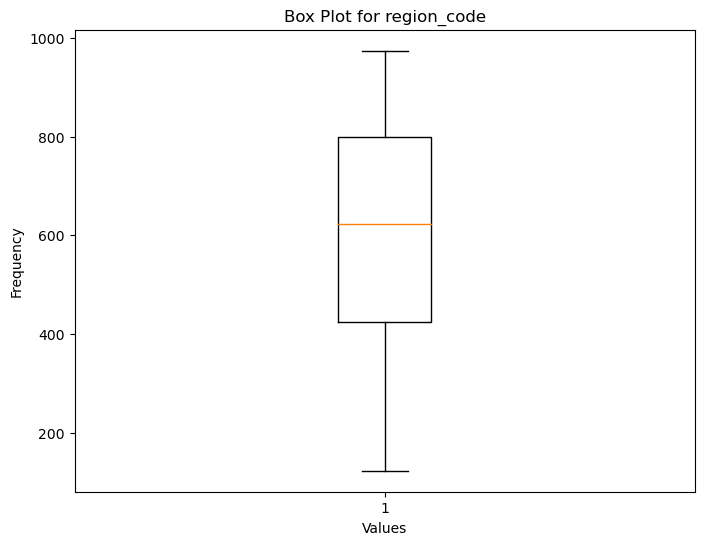

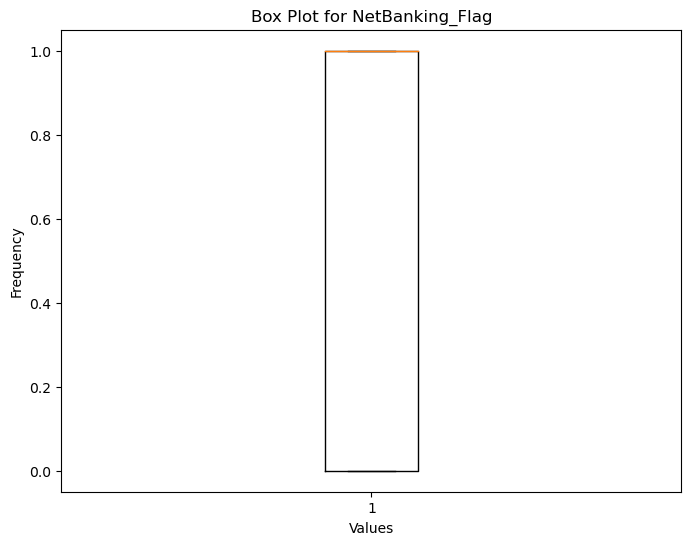

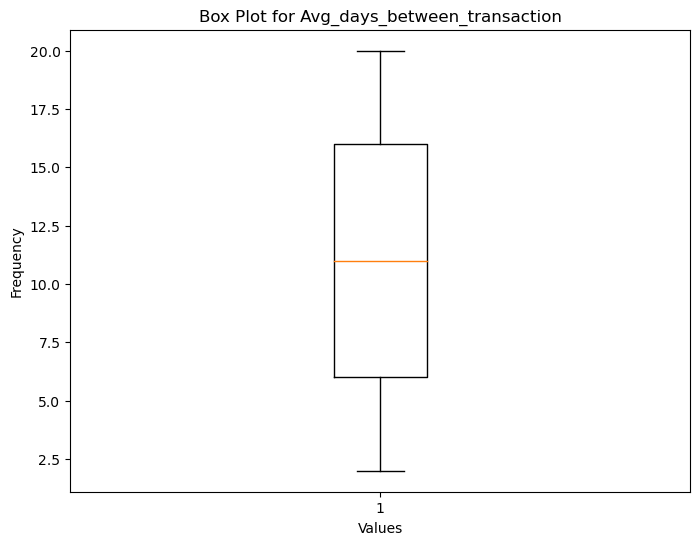

In [35]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = merged_df.select_dtypes(include=['int64', 'float64'])

# Plot box plots for each numerical column
for column in numerical_columns.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(numerical_columns[column])
    plt.title('Box Plot for ' + column)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()





In [36]:
merged_df.drop(['age','region_code','personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed','gender'], axis=1, inplace=True)

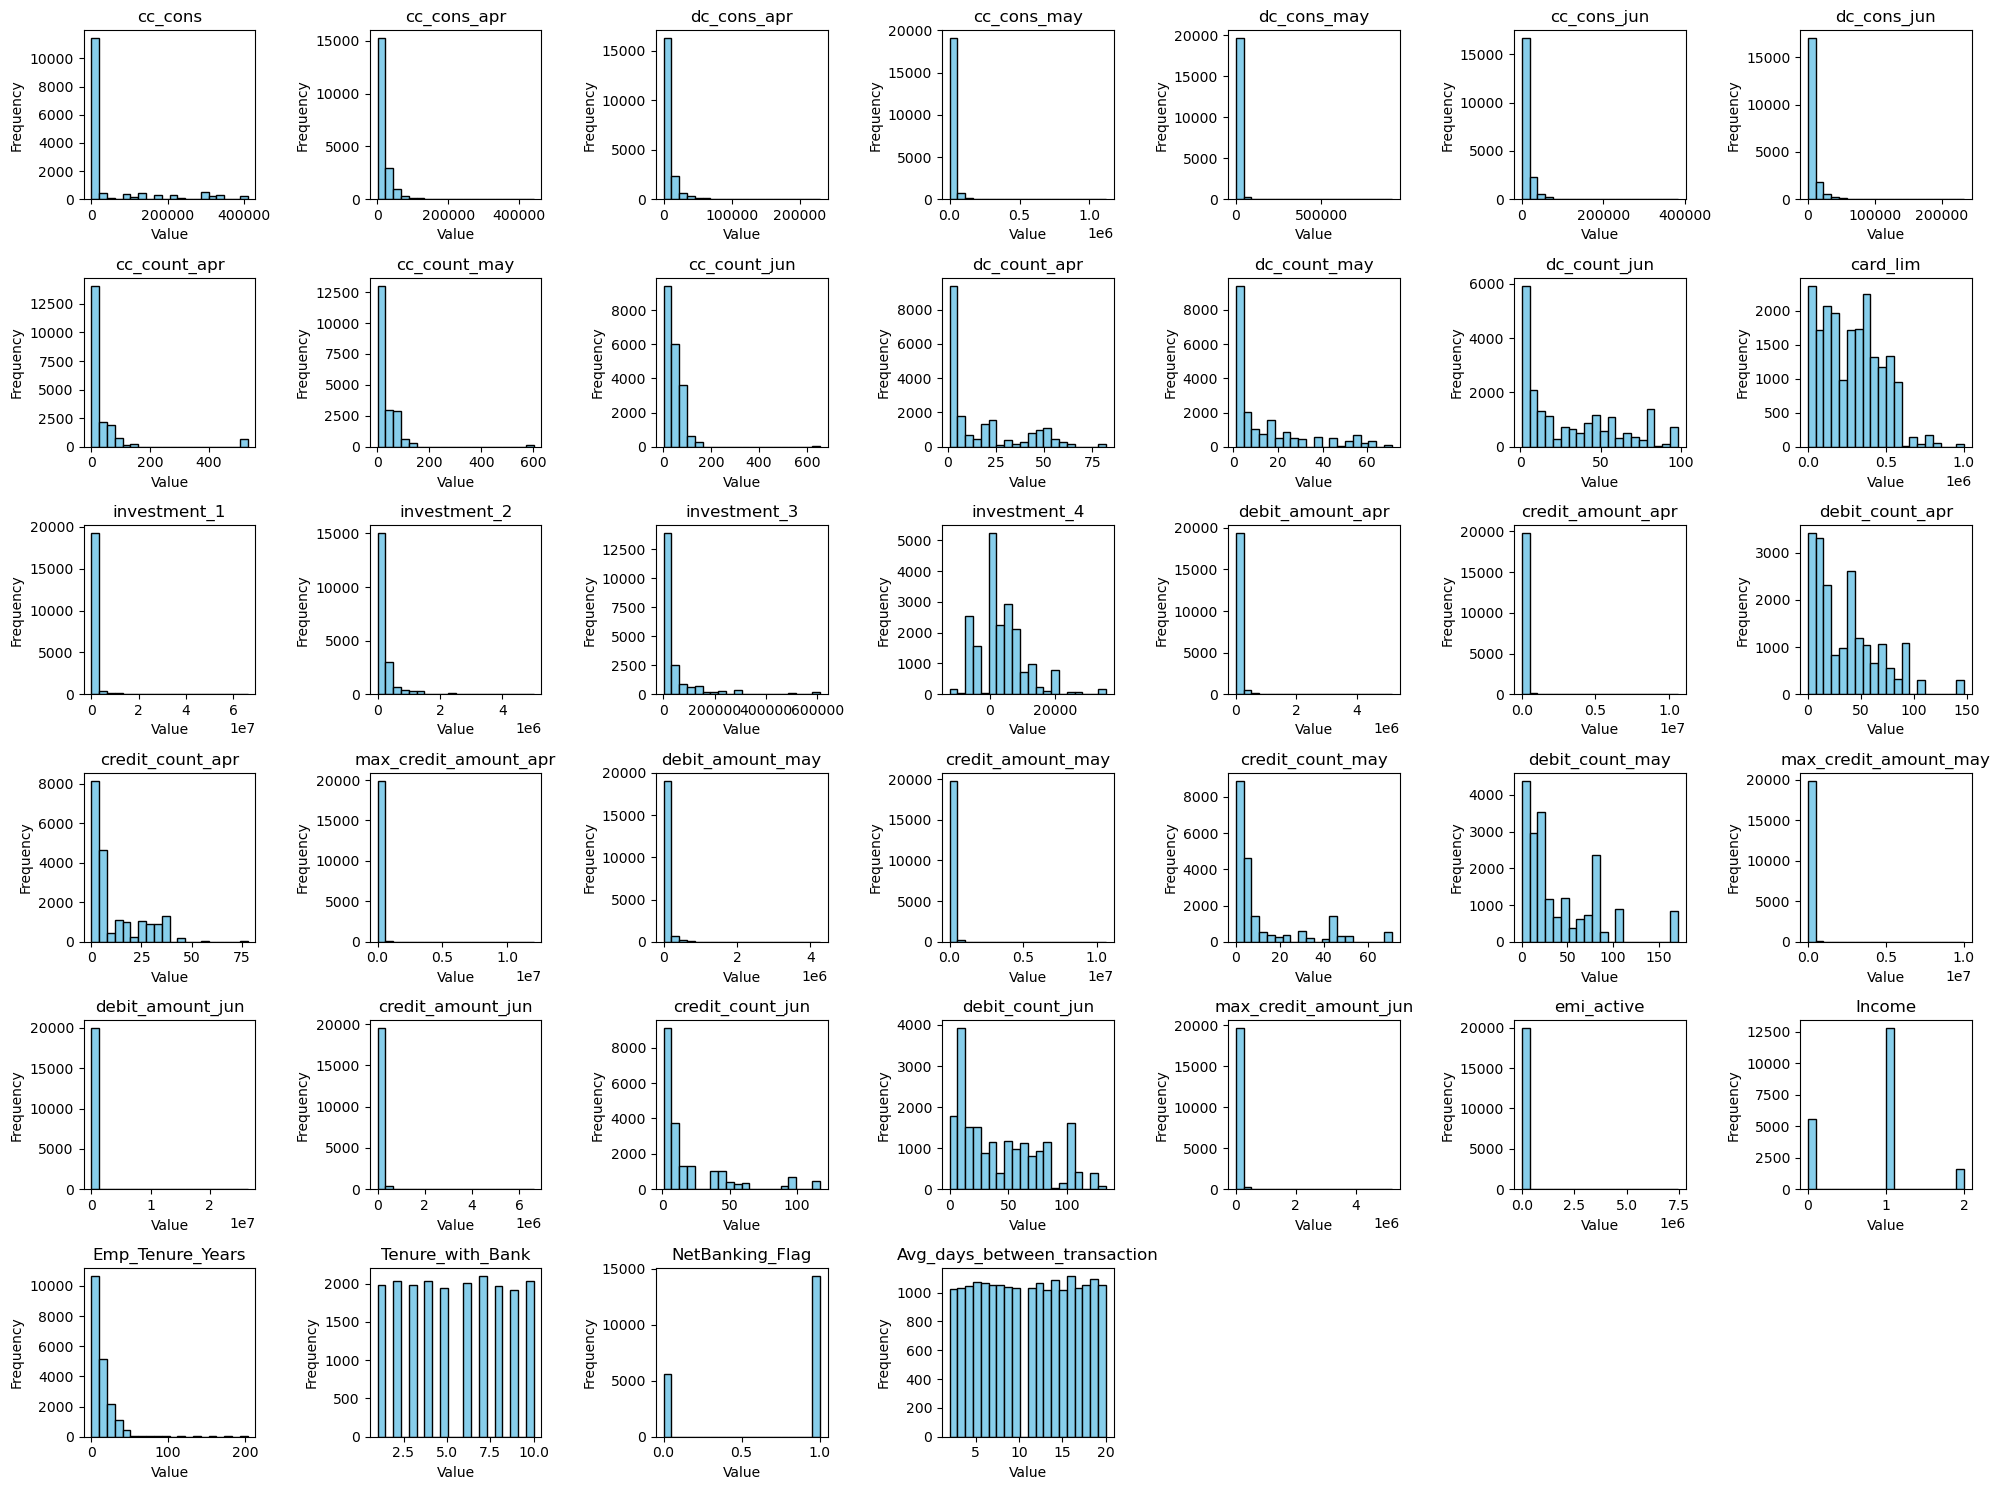

In [37]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = merged_df.select_dtypes(include=['int64', 'float64'])

# Determine subplot grid size
num_plots = len(numerical_columns.columns)
num_rows = num_plots // 7 + (num_plots % 7 > 0)  # Adjust 7 based on the number of desired columns per row
num_cols = min(num_plots, 7)  # Maximum 7 columns per row

# Plot histograms for each numerical column
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(num_rows, num_cols, i+1)
    plt.hist(merged_df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical columns for regression
numerical_columns = merged_df.select_dtypes(include=['int64', 'float64'])

# Exclude 'cc_cons' from the predictor variables
predictor_columns = numerical_columns.drop(columns=['cc_cons'])

# Add a constant term for the intercept in the regression model
X = sm.add_constant(predictor_columns)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)


In [ ]:
# there is no multi co-linearity in data 

In [ ]:
import numpy as np

# Select columns to apply log transformation
columns_to_transform = ['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
                        'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
                        'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
                        'card_lim', 'investment_1', 'investment_2', 'investment_3',
                        'investment_4', 'debit_amount_apr', 'credit_amount_apr',
                        'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
                        'debit_amount_may', 'credit_amount_may', 'credit_count_may',
                        'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
                        'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
                        'max_credit_amount_jun', 'emi_active',
                        'Emp_Tenure_Years', 'Tenure_with_Bank', 'Avg_days_between_transaction']

# Apply log transformation
merged_df[columns_to_transform] = np.log1p(merged_df[columns_to_transform])

# Display the transformed DataFrame
print(merged_df.head())


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select columns to be scaled
columns_to_scale = ['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
                    'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
                    'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
                    'card_lim', 'investment_1', 'investment_2', 'investment_3',
                    'investment_4', 'debit_amount_apr', 'credit_amount_apr',
                    'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
                    'debit_amount_may', 'credit_amount_may', 'credit_count_may',
                    'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
                    'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
                    'max_credit_amount_jun', 'emi_active',
                    'Emp_Tenure_Years', 'Tenure_with_Bank', 'Avg_days_between_transaction']

# Apply Standard scaling
scaler = StandardScaler()
merged_df[columns_to_scale] = scaler.fit_transform(merged_df[columns_to_scale])

# Display the scaled DataFrame
print(merged_df.head())


In [ ]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = merged_df.select_dtypes(include=['int64', 'float64'])

# Determine subplot grid size
num_plots = len(numerical_columns.columns)
num_rows = num_plots // 7 + (num_plots % 7 > 0)  # Adjust 7 based on the number of desired columns per row
num_cols = min(num_plots, 7)  # Maximum 7 columns per row

# Plot histograms for each numerical column
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(num_rows, num_cols, i+1)
    plt.hist(merged_df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
merged_df.isnull().sum()

In [ ]:
investment_mean = merged_df['investment_4'].mean()

# Replace missing values with the mean
merged_df['investment_4'].fillna(investment_mean, inplace=True)


In [ ]:
merged_df.drop(['NetBanking_Flag','Tenure_with_Bank','cc_count_apr','cc_count_may','cc_count_jun','debit_count_apr','debit_count_may','debit_count_jun','dc_count_apr','dc_count_may','dc_count_jun'], axis=1, inplace=True)

In [ ]:
# Step 1: Separate data into training and prediction sets
training_data = merged_df.dropna(subset=['cc_cons'])
prediction_data = merged_df[merged_df['cc_cons'].isnull()]
X_pred = prediction_data.drop(columns=['cc_cons'])

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = merged_df.dropna(subset=['cc_cons']).drop(columns=['cc_cons'])
y = merged_df.dropna(subset=['cc_cons'])['cc_cons']

In [ ]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


# linear regression 

In [ ]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
#Lower the MSE value indicates better performance
#Higher the R2 square value (0-1) indicates a better model.

In [ ]:
#Here MSE value is exceptionally high and R2 Square value is -ve. It indicates Linerar Regression model for this problem statement is not a better solution

In [ ]:
y_pred = model.predict(X_pred)
prediction_data['cc_cons'] = y_pred

In [ ]:
prediction_data['cc_cons']

# RANDOM FOREST

In [ ]:
# Initialize the Random Forest regressor
model = RandomForestRegressor(max_depth=5,max_features=3, n_estimators=100)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


In [ ]:
#Here MSE value is exceptionally high and R2 Square value is -ve. It indicates Linerar Regression model for this problem statement is not a better solution

In [ ]:
y_pred = model.predict(X_pred)
prediction_data['cc_cons'] = y_pred

In [ ]:
prediction_data['cc_cons']

# svm

In [ ]:
# Initialize the Support Vector Machine regressor
model = SVR(kernel='linear',degree=3,max_iter=200)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


In [ ]:
y_pred = model.predict(X_pred)
prediction_data['cc_cons'] = y_pred
prediction_data['cc_cons']

In [ ]:
#In each cases, a negative R-squared score suggests that the model does not capture any meaningful relationship between the independent and dependent variables, and it might be overfitting the data or fitting it completely incorrectly. 

In [ ]:
#This indicates a further dimensionality reduction is required to eliminate unwanted features and then try these Reggression models or the quality of data to be rechecked.

In [ ]:
# Apply PCA (principal Component Analysis)
pca = PCA()
X_pca = pca.fit_transform(X_train)

# Select top 15 principal components 
top_components = X_pca[:, :15]

# Split the data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(top_components, y_train, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(random_state=100,max_depth=5,max_features=2, n_estimators=200)
model.fit(X_train_pca, y_train_pca)

# Make predictions on the test data
y_pred = model.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test_pca, y_pred)
r2 = r2_score(y_test_pca, y_pred)

# Display evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


In [ ]:
#Conclusion
#this indicates the quality of data set is poor. The source of data to be validated and repeat these steps to build a better model.